In [1]:
import numpy as np
import matplotlib as plt
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
import joblib
from pandasql import sqldf
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score ,KFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler



In [2]:
df = pd.read_csv(r"C:\Users\YOMNA\Documents\projects\CarCornerEnergy_frontend\src\REG.MODEL\electric_car.csv")

In [3]:
df.head()

,carFullName,make,model,MinimalPrice,EnginePower,MaximumTorque,TypeOfBrakes,DriveType,BatteryCapacity,Range,...,PermissableGrossWeight,MaximumLoadCapacity,NumberOfSeats,Number of doors,TireSize,MaximumSpeed,BootCapacity,Acceleration,MaximumDCchargingPower,MeanEnergyconsumption
0,Audi e-tron 55 quattro,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,388,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi e-tron 50 quattro,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,376,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi e-tron S quattro,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,500,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi e-tron Sportback 50 quattro,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,371,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi e-tron Sportback 55 quattro,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,377,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [4]:
df.shape

(53, 25)

In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   carFullName             53 non-null     object 
 1   make                    53 non-null     object 
 2   model                   53 non-null     object 
 3   MinimalPrice            53 non-null     int64  
 4   EnginePower             53 non-null     int64  
 5   MaximumTorque           53 non-null     int64  
 6   TypeOfBrakes            52 non-null     object 
 7   DriveType               53 non-null     object 
 8   BatteryCapacity         53 non-null     float64
 9   Range                   53 non-null     int64  
 10  Wheelbase               53 non-null     float64
 11  Length                  53 non-null     float64
 12  Width                   53 non-null     float64
 13  Height                  53 non-null     float64
 14  MinimalEmptyWeight      53 non-null     int6

In [6]:
print(df.describe())


        MinimalPrice  EnginePower  MaximumTorque  BatteryCapacity       Range  \
count      53.000000    53.000000      53.000000        53.000000   53.000000   
mean   246158.509434   269.773585     460.037736        62.366038  356.905660   
std    149187.485190   181.298589     261.647000        24.170913   89.530456   
min     82050.000000    82.000000     160.000000        17.600000  265.000000   
25%    142900.000000   136.000000     260.000000        40.000000  293.000000   
50%    178400.000000   204.000000     362.000000        58.000000  318.000000   
75%    339480.000000   372.000000     640.000000        80.000000  383.000000   
max    794000.000000   772.000000    1140.000000       100.000000  612.000000   

        Wheelbase      Length       Width      Height  MinimalEmptyWeight  \
count   53.000000   53.000000   53.000000   53.000000           53.000000   
mean   273.581132  442.509434  186.241509  155.422642         1868.452830   
std     22.740518   48.863280   14.2806

In [7]:
df.isnull().sum().sum()

30

In [8]:
df[df.isnull().any(axis=1)].shape[0]

11

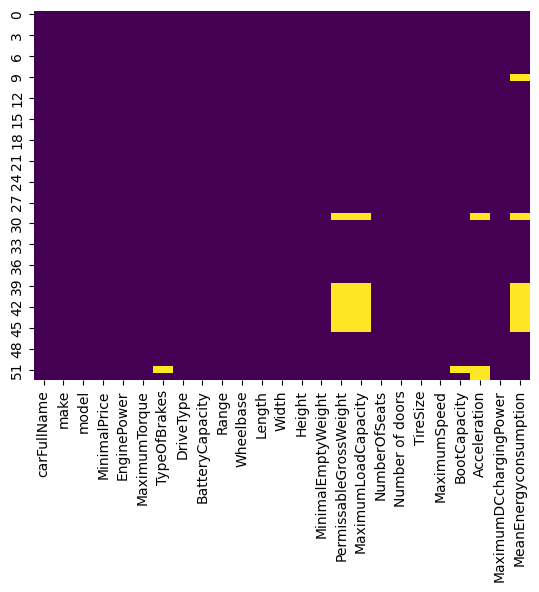

In [9]:
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [10]:
total_rows = df.shape[0]
incomplete_rows = df[df.isnull().any(axis=1)].shape[0]
percentage_incomplete = (incomplete_rows / total_rows) * 100
print(f"Total percentage of incomplete cases: {percentage_incomplete:.2f}%")


Total percentage of incomplete cases: 20.75%


In [11]:
df = df.dropna()
df.isna().sum().sum()

0

In [12]:
df = df.drop(df.columns[0], axis=1)

df.head()


,make,model,MinimalPrice,EnginePower,MaximumTorque,TypeOfBrakes,DriveType,BatteryCapacity,Range,Wheelbase,...,PermissableGrossWeight,MaximumLoadCapacity,NumberOfSeats,Number of doors,TireSize,MaximumSpeed,BootCapacity,Acceleration,MaximumDCchargingPower,MeanEnergyconsumption
0,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,388,292.8,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,376,292.8,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,500,292.8,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,371,292.8,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,377,292.8,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [13]:
new_names = ["Make","Model","price", "power", "torque", "brakes", "drive_type", "battery_cap",
             "distance", "wheelbase", "length", "width", "height",
             "min_emp_weight", "perm_gross_weight", "max_load_cap", "n_seats",
             "n_doors", "tire_size", "max_speed", "boot_cap", "acceleration",
             "max_dc", "energy_consumption"]

df.columns = new_names

In [14]:
df.head()

,Make,Model,price,power,torque,brakes,drive_type,battery_cap,distance,wheelbase,...,perm_gross_weight,max_load_cap,n_seats,n_doors,tire_size,max_speed,boot_cap,acceleration,max_dc,energy_consumption
0,Audi,e-tron 55 quattro,345700,360,664,disc (front + rear),4WD,95.0,388,292.8,...,3130.0,640.0,5,5,19,200,660.0,5.7,150,24.45
1,Audi,e-tron 50 quattro,308400,313,540,disc (front + rear),4WD,71.0,376,292.8,...,3040.0,670.0,5,5,19,190,660.0,6.8,150,23.80
2,Audi,e-tron S quattro,414900,503,973,disc (front + rear),4WD,95.0,500,292.8,...,3130.0,565.0,5,5,20,210,660.0,4.5,150,27.55
3,Audi,e-tron Sportback 50 quattro,319700,313,540,disc (front + rear),4WD,71.0,371,292.8,...,3040.0,640.0,5,5,19,190,615.0,6.8,150,23.30
4,Audi,e-tron Sportback 55 quattro,357000,360,664,disc (front + rear),4WD,95.0,377,292.8,...,3130.0,670.0,5,5,19,200,615.0,5.7,150,23.85


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 0 to 50
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                42 non-null     object 
 1   Model               42 non-null     object 
 2   price               42 non-null     int64  
 3   power               42 non-null     int64  
 4   torque              42 non-null     int64  
 5   brakes              42 non-null     object 
 6   drive_type          42 non-null     object 
 7   battery_cap         42 non-null     float64
 8   distance            42 non-null     int64  
 9   wheelbase           42 non-null     float64
 10  length              42 non-null     float64
 11  width               42 non-null     float64
 12  height              42 non-null     float64
 13  min_emp_weight      42 non-null     int64  
 14  perm_gross_weight   42 non-null     float64
 15  max_load_cap        42 non-null     float64
 16  n_seats        

In [16]:
col_less_5_unique = df.apply(lambda col: col.nunique() <= 5)

data_filtered = df.loc[:, col_less_5_unique]

data_filtered = data_filtered.apply(lambda col: col.astype('category'))

print("Info of the DataFrame with columns converted to factors:")
print(data_filtered.info())

df.loc[:, col_less_5_unique] = data_filtered

del col_less_5_unique

Info of the DataFrame with columns converted to factors:
<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 0 to 50
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   brakes      42 non-null     category
 1   drive_type  42 non-null     category
 2   n_seats     42 non-null     category
 3   n_doors     42 non-null     category
dtypes: category(4)
memory usage: 1.1 KB
None


In [17]:
numeric_columns = df.select_dtypes(include=['number']).columns
factor_columns = df.select_dtypes(include=['object', 'category']).columns

factor_columns = factor_columns.union(['n_doors', 'n_seats']) 
numeric_columns = numeric_columns.difference(['n_doors', 'n_seats'])

df_numeric = df[numeric_columns]
df_factor = df[factor_columns]

print("Numeric DataFrame:")
print(df_numeric.head())

print("\nFactor DataFrame:")
print(df_factor.head())

Numeric DataFrame:
   acceleration  battery_cap  boot_cap  distance  energy_consumption  height  \
0           5.7         95.0     660.0       388               24.45   162.9   
1           6.8         71.0     660.0       376               23.80   162.9   
2           4.5         95.0     660.0       500               27.55   162.9   
3           6.8         71.0     615.0       371               23.30   161.6   
4           5.7         95.0     615.0       377               23.85   161.6   

   length  max_dc  max_load_cap  max_speed  min_emp_weight  perm_gross_weight  \
0   490.1     150         640.0        200            2565             3130.0   
1   490.1     150         670.0        190            2445             3040.0   
2   490.2     150         565.0        210            2695             3130.0   
3   490.1     150         640.0        190            2445             3040.0   
4   490.1     150         670.0        200            2595             3130.0   

   power   pr

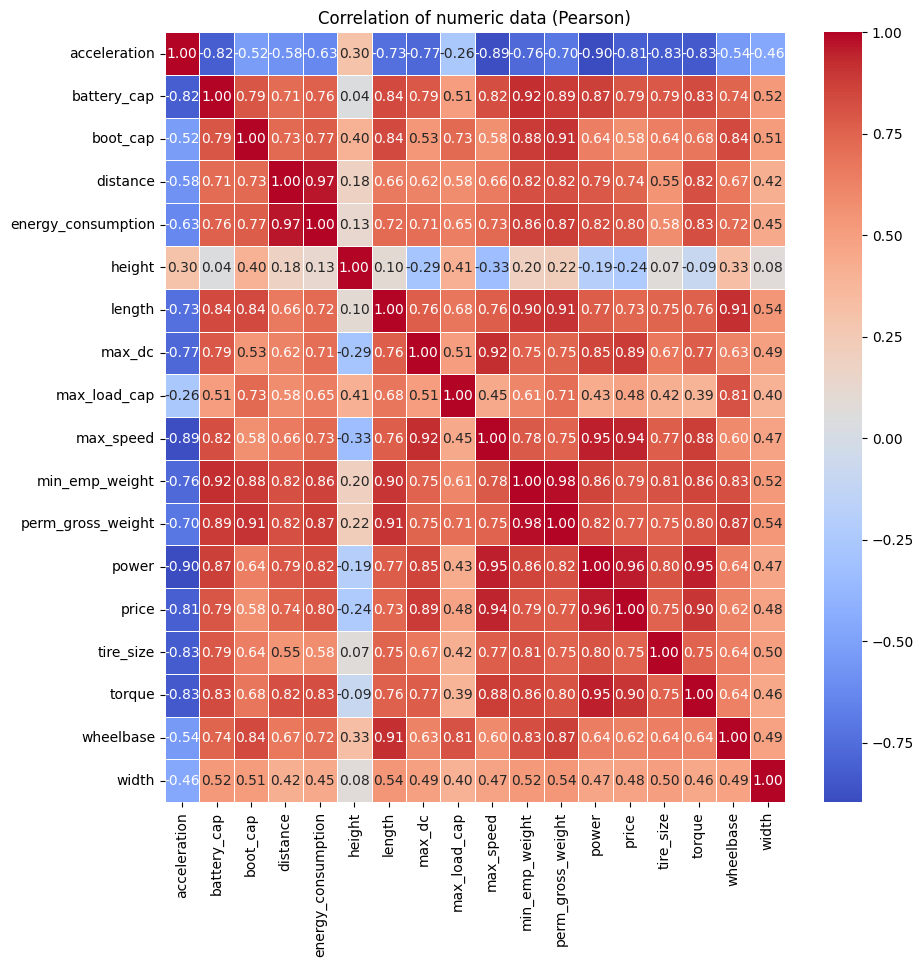

In [18]:
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10,10))

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)


plt.yticks(rotation=0)

plt.title('Correlation of numeric data (Pearson)')

plt.show()

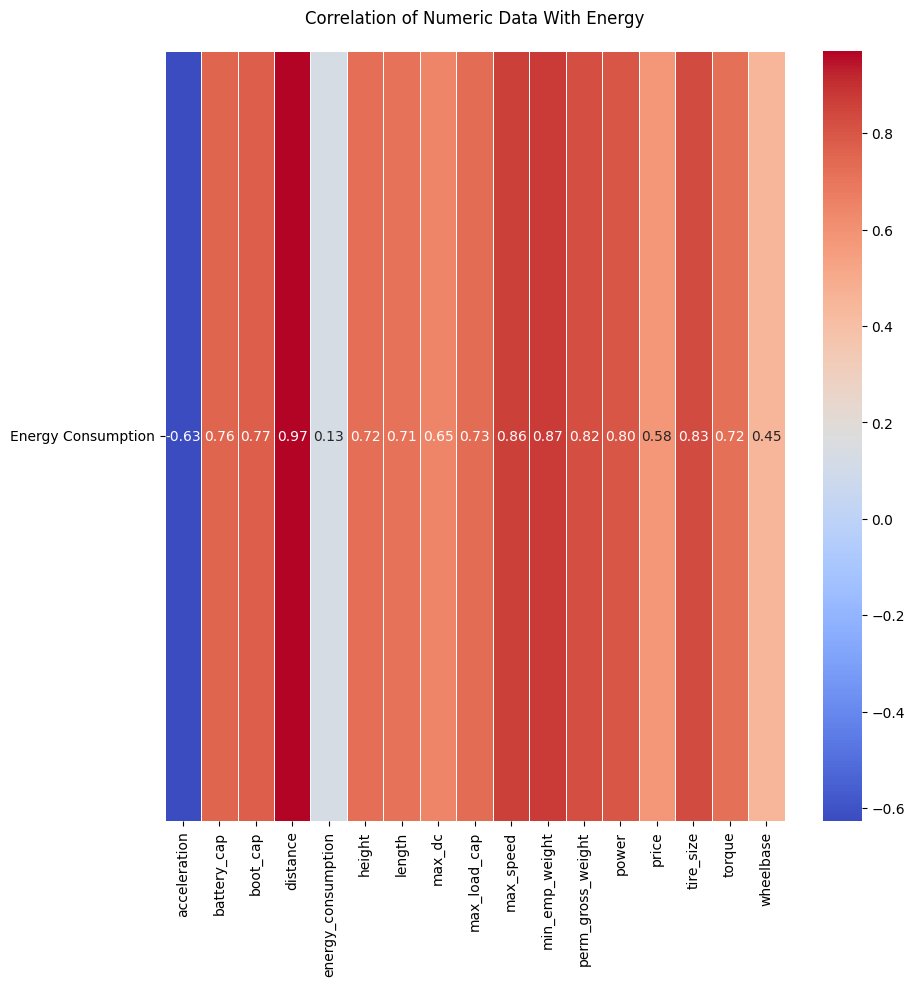

In [19]:
energy_cor = df_numeric.drop('energy_consumption', axis=1).corrwith(df['energy_consumption'])

corr_values = np.array(energy_cor).reshape(1, -1)

corr_df = pd.DataFrame(corr_values, columns=df_numeric.columns[:-1], index=["Energy Consumption"])

plt.figure(figsize=(10, 10))

sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)

plt.yticks(rotation=0)

plt.title('Correlation of Numeric Data With Energy', pad=20)

plt.show()

In [20]:
df_factor.head()



,Make,Model,brakes,drive_type,n_doors,n_seats
0,Audi,e-tron 55 quattro,disc (front + rear),4WD,5,5
1,Audi,e-tron 50 quattro,disc (front + rear),4WD,5,5
2,Audi,e-tron S quattro,disc (front + rear),4WD,5,5
3,Audi,e-tron Sportback 50 quattro,disc (front + rear),4WD,5,5
4,Audi,e-tron Sportback 55 quattro,disc (front + rear),4WD,5,5


In [21]:
df_factor['energy_consumption'] = df['energy_consumption']

C:\Users\YOMNA\AppData\Local\Temp\ipykernel_25300\1363328874.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_factor['energy_consumption'] = df['energy_consumption']


In [22]:
# brakes
pysqldf = lambda q: sqldf(q, globals())

query = """
    SELECT brakes, ROUND(AVG(energy_consumption), 2) AS avg_energy_cons
    FROM df_factor
    GROUP BY brakes
"""

brakes_avg = pysqldf(query)
print(brakes_avg)

                       brakes  avg_energy_cons
0         disc (front + rear)            19.13
1  disc (front) + drum (rear)            16.01


In [23]:
# drive type
pysqldf = lambda q: sqldf(q, globals())

query = """
    SELECT drive_type, ROUND(AVG(energy_consumption), 2) AS avg_energy_cons
    FROM df_factor
    GROUP BY drive_type
"""
drive_type_avg = pysqldf(query)
print(drive_type_avg)

    drive_type  avg_energy_cons
0  2WD (front)            16.37
1   2WD (rear)            16.36
2          4WD            24.22


In [24]:
# n_seats
pysqldf = lambda q: sqldf(q, globals())

query = """
    SELECT n_seats, ROUND(AVG(energy_consumption), 2) AS avg_energy_cons
    FROM df_factor
    GROUP BY n_seats
"""
n_seats_avg = pysqldf(query)
print(n_seats_avg)

   n_seats  avg_energy_cons
0        2            16.35
1        4            18.80
2        5            18.40
3        8            25.20


In [25]:
# n_doors
pysqldf = lambda q: sqldf(q, globals())

query = """
    SELECT n_doors, ROUND(AVG(energy_consumption), 2) AS avg_energy_cons
    FROM df_factor
    GROUP BY n_doors
"""

n_doors_avg = pysqldf(query)

print(n_doors_avg)

   n_doors  avg_energy_cons
0        3            16.55
1        4            24.36
2        5            18.09


In [26]:
df_factor.columns

Index(['Make', 'Model', 'brakes', 'drive_type', 'n_doors', 'n_seats',
       'energy_consumption'],
      dtype='object')

In [27]:
new_order = [ 'Make', 'Model','drive_type','n_doors', 'n_seats',  'brakes', 'energy_consumption']

df_factor = df[new_order]

df_factor.head()


,Make,Model,drive_type,n_doors,n_seats,brakes,energy_consumption
0,Audi,e-tron 55 quattro,4WD,5,5,disc (front + rear),24.45
1,Audi,e-tron 50 quattro,4WD,5,5,disc (front + rear),23.80
2,Audi,e-tron S quattro,4WD,5,5,disc (front + rear),27.55
3,Audi,e-tron Sportback 50 quattro,4WD,5,5,disc (front + rear),23.30
4,Audi,e-tron Sportback 55 quattro,4WD,5,5,disc (front + rear),23.85


C:\Users\YOMNA\AppData\Local\Temp\ipykernel_25300\355076998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_factor['drive_type'] = df_factor['drive_type'].replace({'4WD': '4WD', 'other_value': '2WD (front or rear)'})


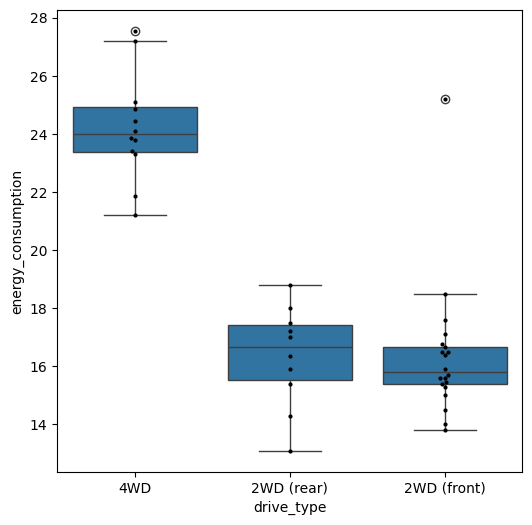

In [28]:
df_factor['drive_type'] = df_factor['drive_type'].replace({'4WD': '4WD', 'other_value': '2WD (front or rear)'})

plt.figure(figsize=(6, 6))
sns.boxplot(x='drive_type', y='energy_consumption', data= df_factor)
sns.swarmplot(x='drive_type', y='energy_consumption', data= df_factor, color="black", size=3)

plt.show()


In [29]:
unique_drive_types = df_factor['drive_type'].unique()

print("Unique drive types:")
print(unique_drive_types)

Unique drive types:
['4WD' '2WD (rear)' '2WD (front)']


In [30]:

filtered_data_2WD = df_factor[(df_factor['drive_type'] == '2WD (front)') | (df_factor['drive_type'] == '2WD (rear)')]

mean_2WD_combined = filtered_data_2WD['energy_consumption'].mean()

print("Mean energy consumption for 2WD (front) or 2WD (rear):", mean_2WD_combined)

Mean energy consumption for 2WD (front) or 2WD (rear): 16.366666666666664


C:\Users\YOMNA\AppData\Local\Temp\ipykernel_25300\3468503321.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mean_2WD = df_factor[df_factor['drive_type'].str.contains('2WD(front|rear)')]['energy_consumption'].mean()
C:\Users\YOMNA\AppData\Local\Temp\ipykernel_25300\3468503321.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_factor['energy_consumption'] = df_factor.apply(lambda row: mean_2WD if (row['drive_type'].find('2WD(front') != -1 or row['drive_type'].find('2WD(rear') != -1) and row['energy_consumption'] > 20 else row['energy_consumption'], axis=1)


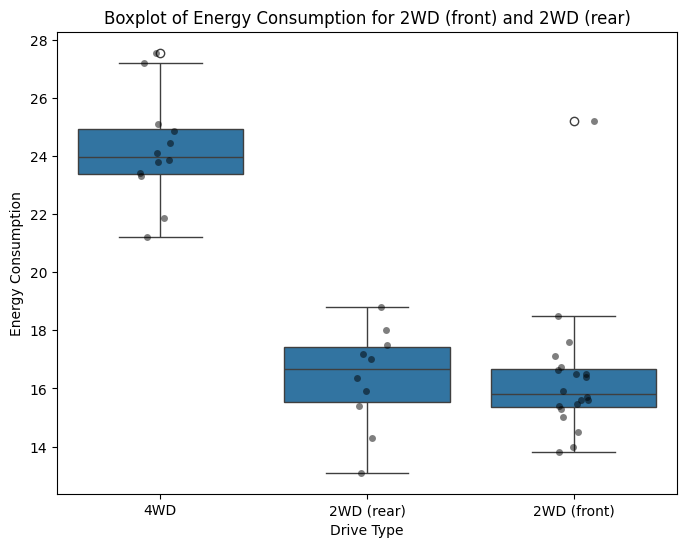

In [31]:
mean_2WD = df_factor[df_factor['drive_type'].str.contains('2WD(front|rear)')]['energy_consumption'].mean()

df_factor['energy_consumption'] = df_factor.apply(lambda row: mean_2WD if (row['drive_type'].find('2WD(front') != -1 or row['drive_type'].find('2WD(rear') != -1) and row['energy_consumption'] > 20 else row['energy_consumption'], axis=1)

plt.figure(figsize=(8, 6))
sns.boxplot(x='drive_type', y='energy_consumption', data=df_factor)
sns.stripplot(x='drive_type', y='energy_consumption', data=df_factor, jitter=True, color='black', size=5, alpha=0.5)
plt.title('Boxplot of Energy Consumption for 2WD (front) and 2WD (rear)')
plt.xlabel('Drive Type')
plt.ylabel('Energy Consumption')
plt.show()

In [32]:

energy_cor = df_numeric.corr()['energy_consumption']

# Find column names with absolute correlation greater than 0.2
cols_1 = energy_cor[abs(energy_cor) > 0.2].index.tolist()

print(cols_1)

['acceleration', 'battery_cap', 'boot_cap', 'distance', 'energy_consumption', 'length', 'max_dc', 'max_load_cap', 'max_speed', 'min_emp_weight', 'perm_gross_weight', 'power', 'price', 'tire_size', 'torque', 'wheelbase', 'width']


In [33]:
cols_1 = [col for col in cols_1 if col not in [ 'length', 'acceleration', 'length', 'wheelbase', 'min_emp_weight', 
                                              'max_load_cap',  'boot_cap',
                                              'torque', 'max_speed', 
                                              'max_dc','width','tire_size','price']] 

print(cols_1)

['battery_cap', 'distance', 'energy_consumption', 'perm_gross_weight', 'power']


In [34]:
final_cols = ['drive_type','Make','Model'] + cols_1

print(final_cols)

['drive_type', 'Make', 'Model', 'battery_cap', 'distance', 'energy_consumption', 'perm_gross_weight', 'power']


In [35]:
df = df[final_cols]

print(df.head())

  drive_type  Make                        Model  battery_cap  distance  \
0        4WD  Audi            e-tron 55 quattro         95.0       388   
1        4WD  Audi            e-tron 50 quattro         71.0       376   
2        4WD  Audi             e-tron S quattro         95.0       500   
3        4WD  Audi  e-tron Sportback 50 quattro         71.0       371   
4        4WD  Audi  e-tron Sportback 55 quattro         95.0       377   

   energy_consumption  perm_gross_weight  power  
0               24.45             3130.0    360  
1               23.80             3040.0    313  
2               27.55             3130.0    503  
3               23.30             3040.0    313  
4               23.85             3130.0    360  


In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 0 to 50
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   drive_type          42 non-null     object 
 1   Make                42 non-null     object 
 2   Model               42 non-null     object 
 3   battery_cap         42 non-null     float64
 4   distance            42 non-null     int64  
 5   energy_consumption  42 non-null     float64
 6   perm_gross_weight   42 non-null     float64
 7   power               42 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 3.0+ KB


In [37]:
df['drive_type'] = df['drive_type'].astype('category')
df['Make'] = df['Make'].astype('category')
df['Model'] = df['Model'].astype('category')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 0 to 50
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   drive_type          42 non-null     category
 1   Make                42 non-null     category
 2   Model               42 non-null     category
 3   battery_cap         42 non-null     float64 
 4   distance            42 non-null     int64   
 5   energy_consumption  42 non-null     float64 
 6   perm_gross_weight   42 non-null     float64 
 7   power               42 non-null     int64   
dtypes: category(3), float64(3), int64(2)
memory usage: 4.3 KB
None


In [38]:
print(df.columns)


Index(['drive_type', 'Make', 'Model', 'battery_cap', 'distance',
       'energy_consumption', 'perm_gross_weight', 'power'],
      dtype='object')


In [39]:
#Building the model 
X = df.drop('energy_consumption', axis=1) 
y = df['energy_consumption']
                                           
X_encoded = pd.get_dummies( X, columns=['drive_type','Make', 'Model'], drop_first=True)

model = Pipeline(steps=[
    ('regressor', LinearRegression())
])



X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)

df.to_csv('training_data.csv', index=False)
joblib.dump(model, 'Model.pkl')



y_pred = model.predict(X_test) 

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.38287267343015036
R-squared: 0.9729829936119225
